In [1]:
import pandas as pd 
import numpy as np 
import datetime 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')


# Basic checks
print(df.head())
print(df.tail())

  score runs_scored balls_faced strike_rate fours sixes    opposition  \
0     0           0           1           0     0     0  v Bangladesh   
1    12          12          11      109.09     2     0  v Bangladesh   
2    7*           7           2         350     0     1  v Bangladesh   
3     3           3           7       42.85     0     0    v Pakistan   
4   148         148         123      120.32    15     4    v Pakistan   

          ground        date  odi_number  
0     Chattogram  23/12/2004  ODI # 2199  
1          Dhaka  26/12/2004  ODI # 2201  
2          Dhaka  27/12/2004  ODI # 2202  
3          Kochi  02/04/2005  ODI # 2235  
4  Visakhapatnam  05/04/2005  ODI # 2236  
    score runs_scored balls_faced strike_rate fours sixes     opposition  \
345   56*          56          61        91.8     3     2  v West Indies   
346   42*          42          31      135.48     4     1      v England   
347    35          35          33      106.06     4     0   v Bangladesh   

In [3]:
# Data cleaning - Opposition name says 'v Aus' etc, we can remove 'v '
df['opposition'] = df['opposition'].apply(lambda x: x[2:])

# Add a 'feature' - 'year' column using the match date column
# First convert date column into datetime format
df['date'] = pd.to_datetime(df['date'], dayfirst=True) 
df['year'] = df['date'].dt.year.astype(int)
#print(df.head())

In [4]:
# Create a column to distinguish between out and not out

# The apply method in Pandas allows you to apply a function to each element in a DataFrame or Series. In this case, the function being applied is str, which is the built-in Python function for converting values into strings. By applying str to each element in the 'score' column, we are converting the numerical or other data types in that column into string data types.
df['score'] = df['score'].apply(str) 
df['not_out'] = np.where(df['score'].str.endswith('*'), 1, 0)

In [5]:

# dropping the odi_number feature because it adds no value to the analysis
df.drop(columns='odi_number', inplace=True)

In [6]:
# dropping those innings where Dhoni did not bat and storing in a new DataFrame 
# Take all the columns, starting with runs_scored
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')), 'runs_scored':]
#print(df_new.head())

In [7]:
# fixing the data types of numerical columns 
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int) 
df_new['strike_rate'] = df_new['strike_rate'].astype(float) 
df_new['fours'] = df_new['fours'].astype(int) 
df_new['sixes'] = df_new['sixes'].astype(int)

In [8]:
# Career stats
first_match_date = df['date'].dt.date.min().strftime('%B %d, %Y') # first match
print('First match:', first_match_date)
last_match_date = df['date'].dt.date.max().strftime('%B %d, %Y') # last match
print('Last match:', last_match_date)
number_of_matches = df.shape[0] # number of mathces played in career
print('Number of matches played:', number_of_matches)
number_of_inns = df_new.shape[0] # number of innings
print('Number of innings played:', number_of_inns)
not_outs = df_new['not_out'].sum() # number of not outs in career
print('Not outs:', not_outs)
runs_scored = df_new['runs_scored'].sum() # runs scored in career
print('Runs scored in career:', runs_scored)
balls_faced = df_new['balls_faced'].sum() # balls faced in career
print('Balls faced in career:', balls_faced)
career_sr = (runs_scored / balls_faced)*100 # career strike rate
print('Career strike rate: {:.2f}'.format(career_sr))
career_avg = (runs_scored / (number_of_inns - not_outs)) # career average
print('Career average: {:.2f}'.format(career_avg))
#highest_score_date = df_new.loc[df_new.runs_scored == df_new.runs_scored.max(), 'date'].values[0]
#highest_score = df.loc[df.date == highest_score_date, 'score'].values[0] # highest score
highest_score = df_new['runs_scored'].max()
not_out_for_highest = (
    df_new[df_new['runs_scored'] == highest_score]['not_out']
    .replace([1, 0], ["*", ""])  # Replace 1 with *, 0 with null
    .iloc[0]
)

First match: December 23, 2004
Last match: July 09, 2019
Number of matches played: 350
Number of innings played: 297
Not outs: 84
Runs scored in career: 10773
Balls faced in career: 12303
Career strike rate: 87.56
Career average: 50.58


In [9]:
print('Highest score in career:', highest_score, not_out_for_highest)
hundreds = (df_new['runs_scored'] >= 100).sum()
# hundreds = df_new.loc[df_new['runs_scored'] >= 100].shape[0] # number of 100s
print('Number of 100s:', hundreds)
fifties = ((df_new['runs_scored'] >= 50) & (df_new['runs_scored'] < 100)).sum()
# fifties = df_new.loc[(df_new['runs_scored']>=50)&(df_new['runs_scored']<100)].shape[0] #number of 50s
print('Number of 50s:', fifties)
fours = df_new['fours'].sum() # number of fours in career
print('Number of 4s:', fours)
sixes = df_new['sixes'].sum() # number of sixes in career
print('Number of 6s:', sixes)

Highest score in career: 183 *
Number of 100s: 10
Number of 50s: 73
Number of 4s: 826
Number of 6s: 229


opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Ireland          2
Afghanistan      2
Bermuda          1
Scotland         1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


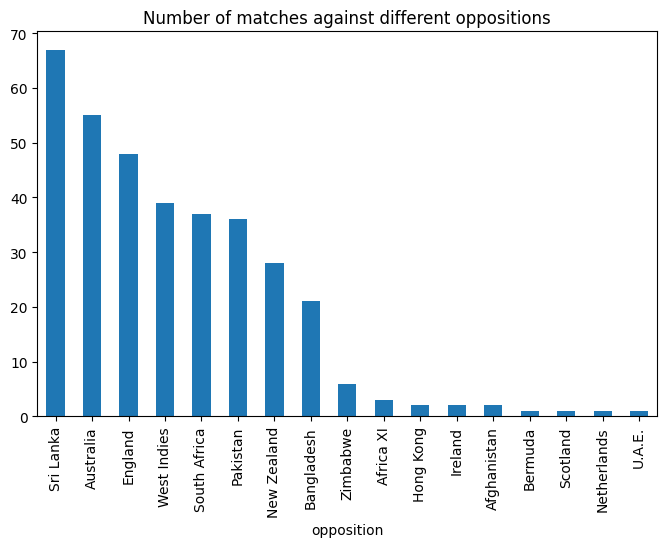

In [10]:


# number of matches played against different oppositions
# Count the occurrences of each unique value in the 'opposition' column
# opposition_counts will be a series with a labelled index as opposition
opposition_counts = df['opposition'].value_counts()
print(opposition_counts)
# Plot the counts as a bar plot
opposition_counts.plot(kind='bar', title='Number of matches against different oppositions', figsize=(8, 5))
plt.show()

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32


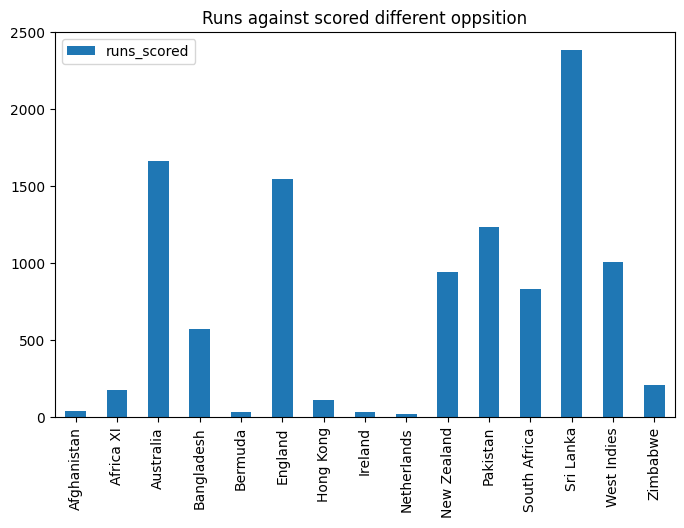

In [11]:
grouped_by_opposition = df_new.groupby('opposition')
sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)
runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()
runs_scored_by_opposition.plot(x= 'opposition', kind = 'bar' , title='Runs against scored different oppsition', figsize= (8,5))
plt.xlabel(None)
plt.show()

<Axes: xlabel='opposition', ylabel='runs_scored'>

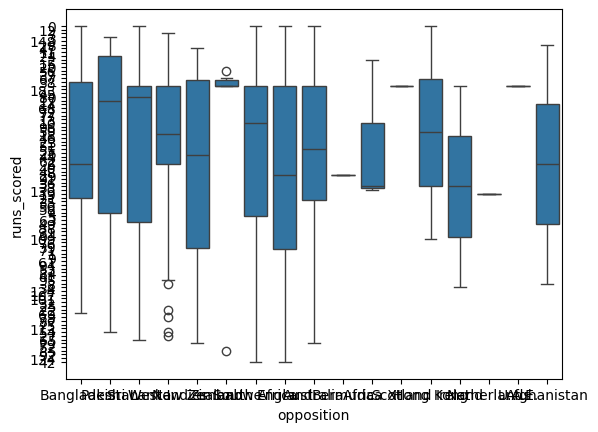

In [12]:
#box plot of the runs scored against various oppositions
sns.boxplot(x='opposition',y='runs_scored',data=df)

In [13]:
#loooks crowded - Let us retain only major countries
#list of oppositions to filter
opposition_list=['England','Australia','West Indies','South Africa','New Zealand','Pakistan','Sri Lanka','Bangladesh']

In [14]:
df_filtered=df_new[df_new['opposition'].isin(opposition_list)]

In [15]:
df_filtered = df_filtered.sort_values(by='runs_scored',ascending=False)

C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_13044\136893424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='opposition',y='runs_scored',data=df_filtered,palette='viridis')


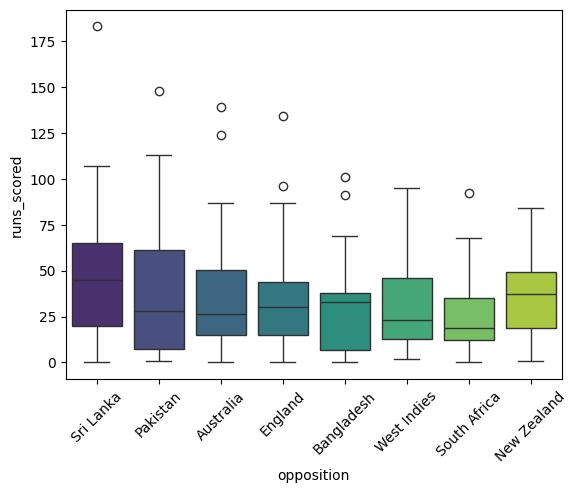

In [16]:
#box plot of the runs scored against various oppositions
sns.boxplot(x='opposition',y='runs_scored',data=df_filtered,palette='viridis')
plt.xticks(rotation=45);

C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_13044\4011337784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='opposition',y='runs_scored',data=df_filtered,palette='viridis')


<Axes: xlabel='opposition', ylabel='runs_scored'>

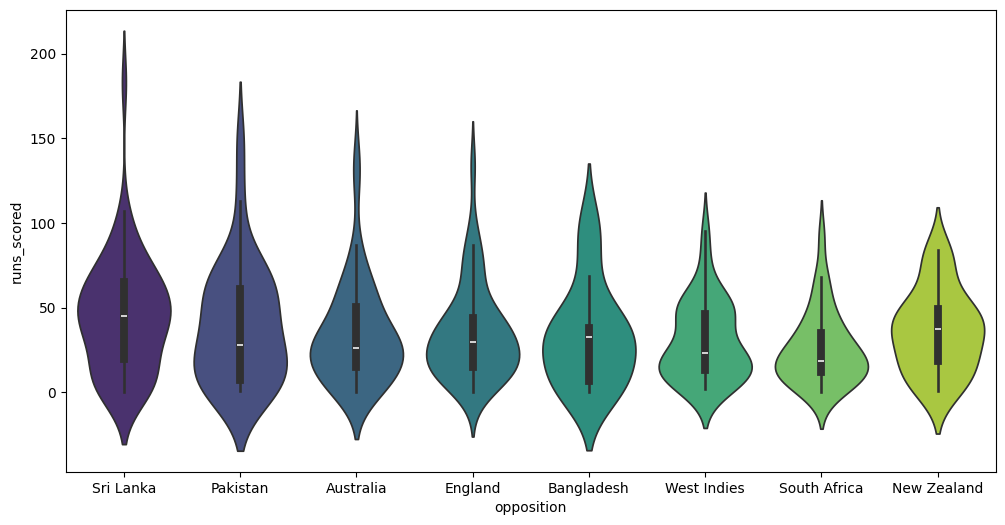

In [17]:
#violin plot
plt.figure(figsize=(12,6))
sns.violinplot(x='opposition',y='runs_scored',data=df_filtered,palette='viridis')

<Figure size 1200x800 with 0 Axes>

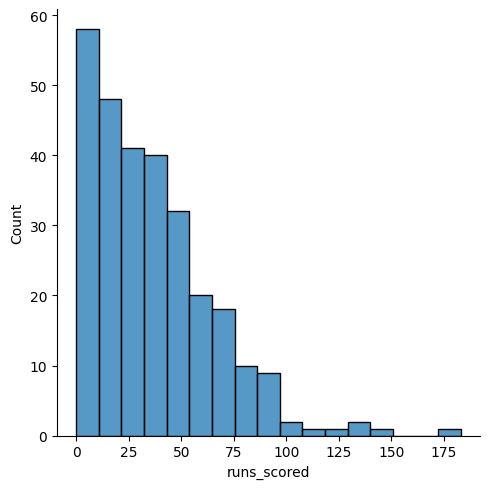

In [18]:
#Distribution plot
plt.figure(figsize=(12,8))
sns.displot(x='runs_scored',data=df_filtered,kde=False)

<Figure size 1200x800 with 0 Axes>

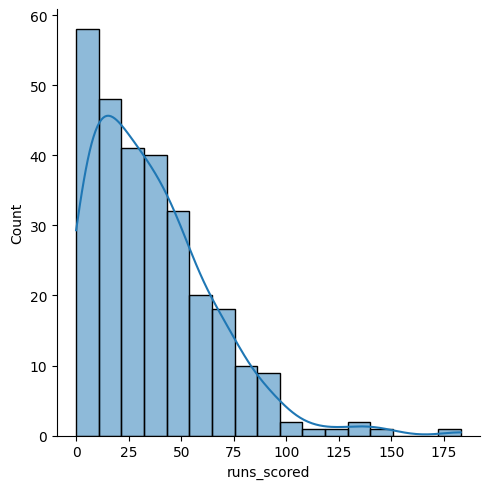

In [19]:
#Distribution plot
plt.figure(figsize=(12,8))
sns.displot(x='runs_scored',data=df_filtered,kde=True)

<Axes: xlabel='runs_scored', ylabel='Count'>

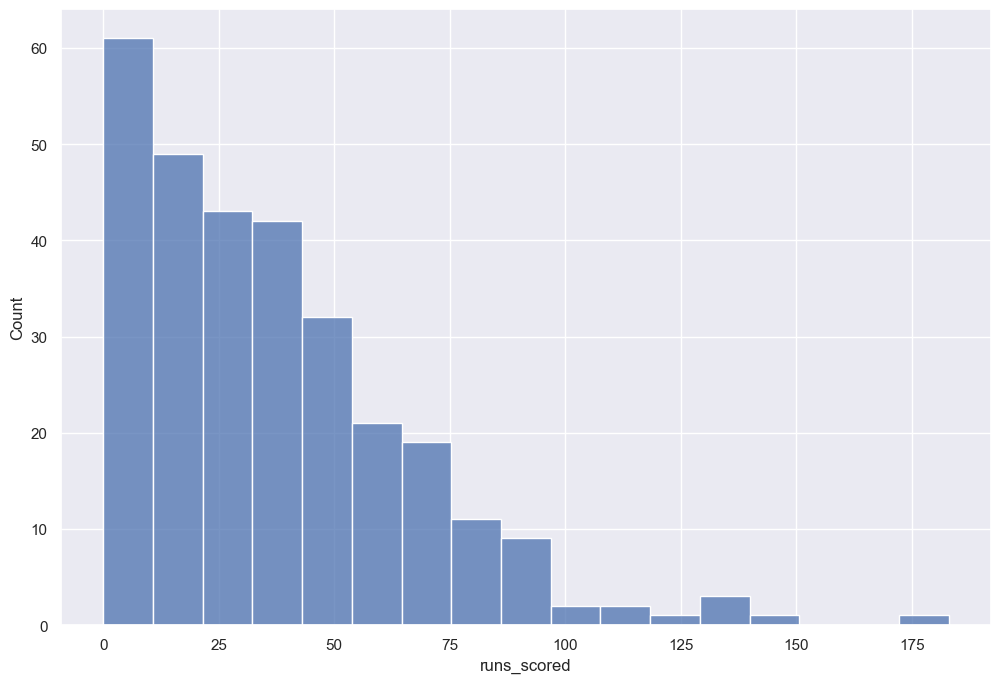

In [20]:
#Histogram with bins
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.histplot(x='runs_scored',data=df_new)

<Axes: xlabel='runs_scored', ylabel='Density'>

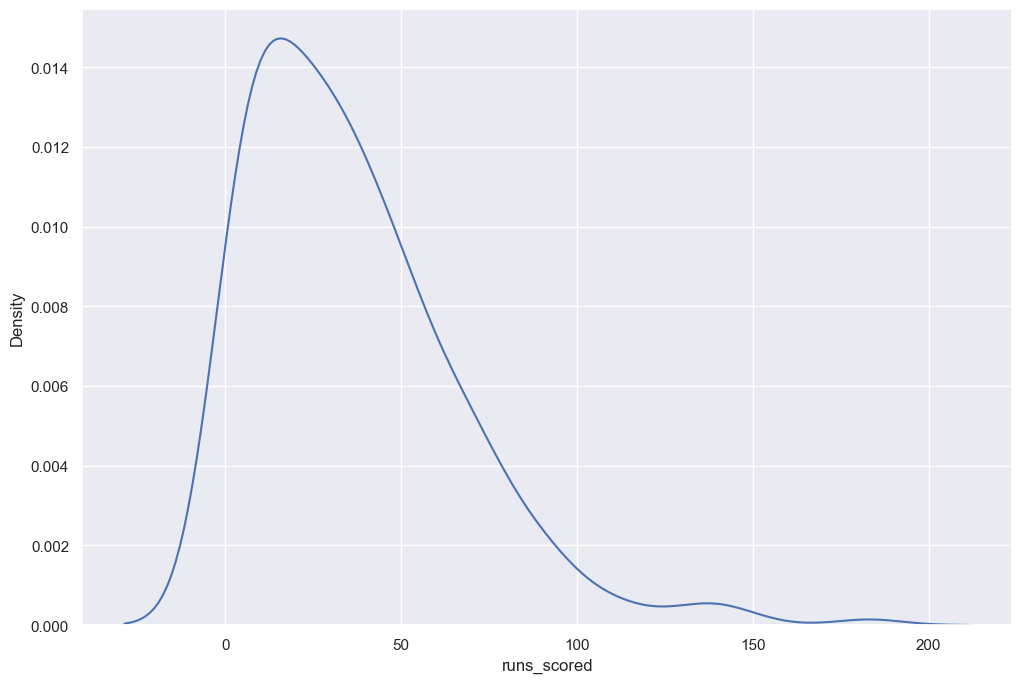

In [21]:
#KDE plot
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.kdeplot(x='runs_scored',data=df_new)

<Axes: xlabel='runs_scored', ylabel='Density'>

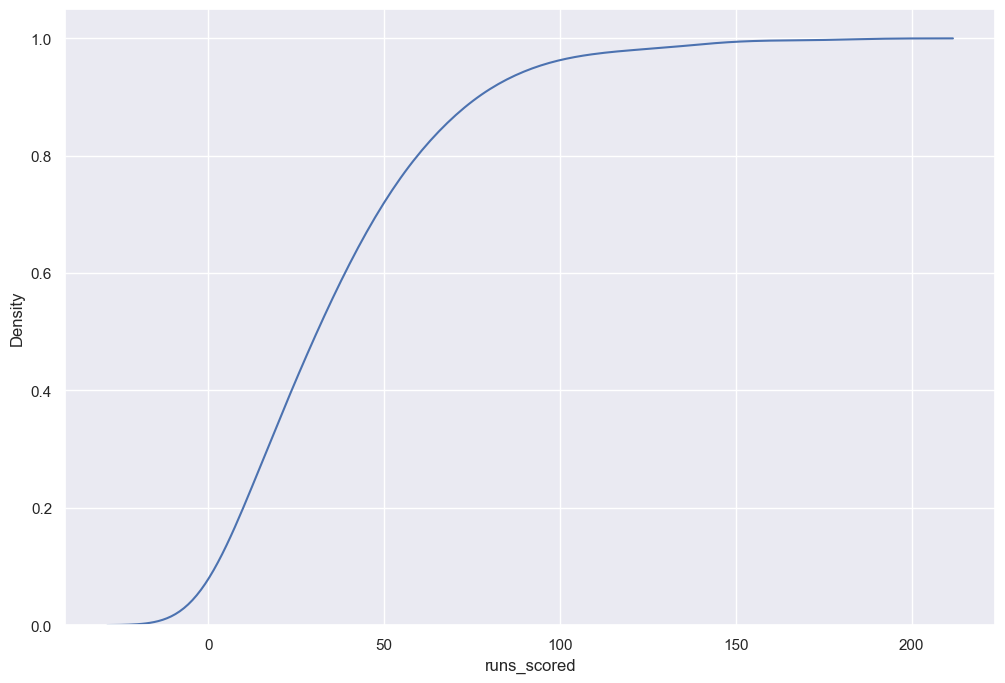

In [22]:
#KDE plot with cumulative probability
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
sns.kdeplot(x='runs_scored',data=df_new,cumulative=True)

<Figure size 1200x800 with 0 Axes>

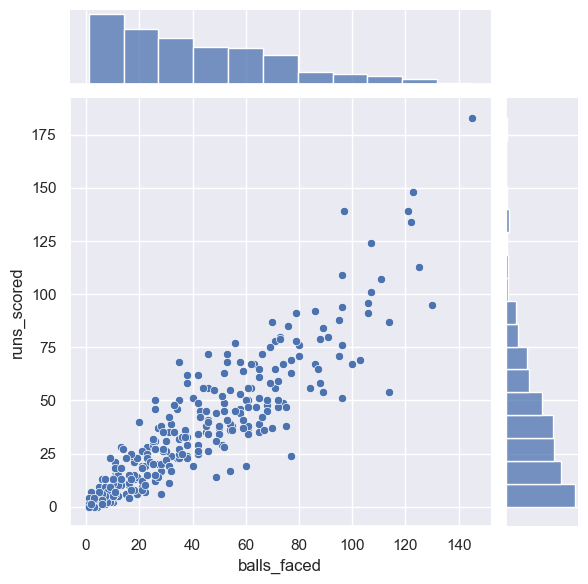

In [23]:
#Joint Plot
plt.figure(figsize=(12,8))
sns.jointplot(x='balls_faced',y='runs_scored',data=df_new,kind='scatter')

In [24]:
correlation_matrix=df_new[['runs_scored','balls_faced']].corr()

<Axes: >

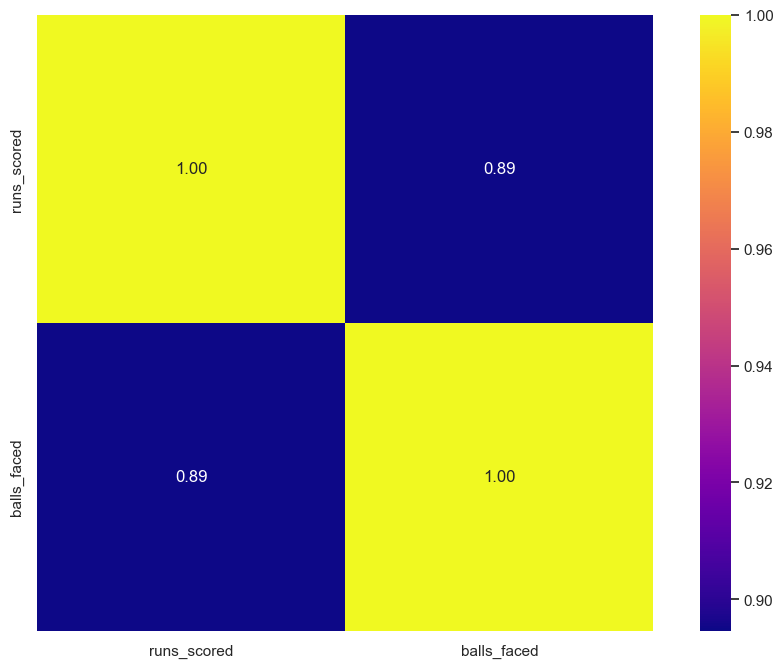

In [25]:
#create heat map
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation_matrix,annot=True,cmap='plasma',square=True,fmt=".2f")

In [26]:
opposition_list=['England','Australia','West Indies','South Africa','New Zealand','Pakistan','Sri Lanka','Bangladesh']
df_filtered=df_new[df_new['opposition'].isin(opposition_list)]

In [27]:
grouped_by_opposition = df_filtered.groupby('opposition')
sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)

opposition
Australia       1660
Bangladesh       569
England         1546
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Name: runs_scored, dtype: int32


In [28]:
grouped_by_opposition = df_filtered.groupby('opposition')
sum_of_balls_faced = grouped_by_opposition['balls_faced'].sum()
print(sum_of_runs_scored)

opposition
Australia       1660
Bangladesh       569
England         1546
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Name: runs_scored, dtype: int32


In [29]:
grp_by_opp = df_filtered.groupby('opposition')

agg_sum = grp_by_opp.agg({'balls_faced': 'sum', 'runs_scored' : 'sum'})

df_strike_rate = agg_sum

df_strike_rate['strike_rate'] = (df_strike_rate['runs_scored']/
df_strike_rate['balls_faced'])*100

print(df_strike_rate)

              balls_faced  runs_scored  strike_rate
opposition                                         
Australia            2052         1660    80.896686
Bangladesh            682          569    83.431085
England              1758         1546    87.940842
New Zealand          1140          940    82.456140
Pakistan             1361         1231    90.448200
South Africa          950          830    87.368421
Sri Lanka            2645         2383    90.094518
West Indies          1108         1005    90.703971


<Axes: ylabel='opposition'>

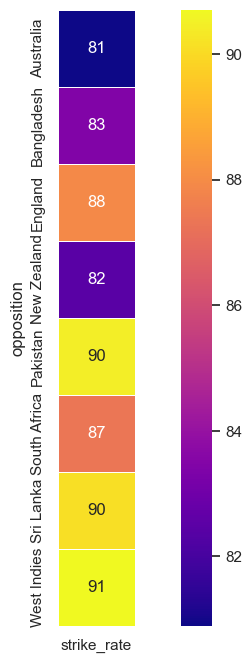

In [30]:
df_strike_rate = df_strike_rate[['strike_rate']]
plt.figure(figsize=(12,8))
sns.heatmap(df_strike_rate,linewidth=0.5,annot=True,cmap='plasma',square=True,fmt=".0f")

In [31]:
df_strike_rate.reset_index(inplace=True)

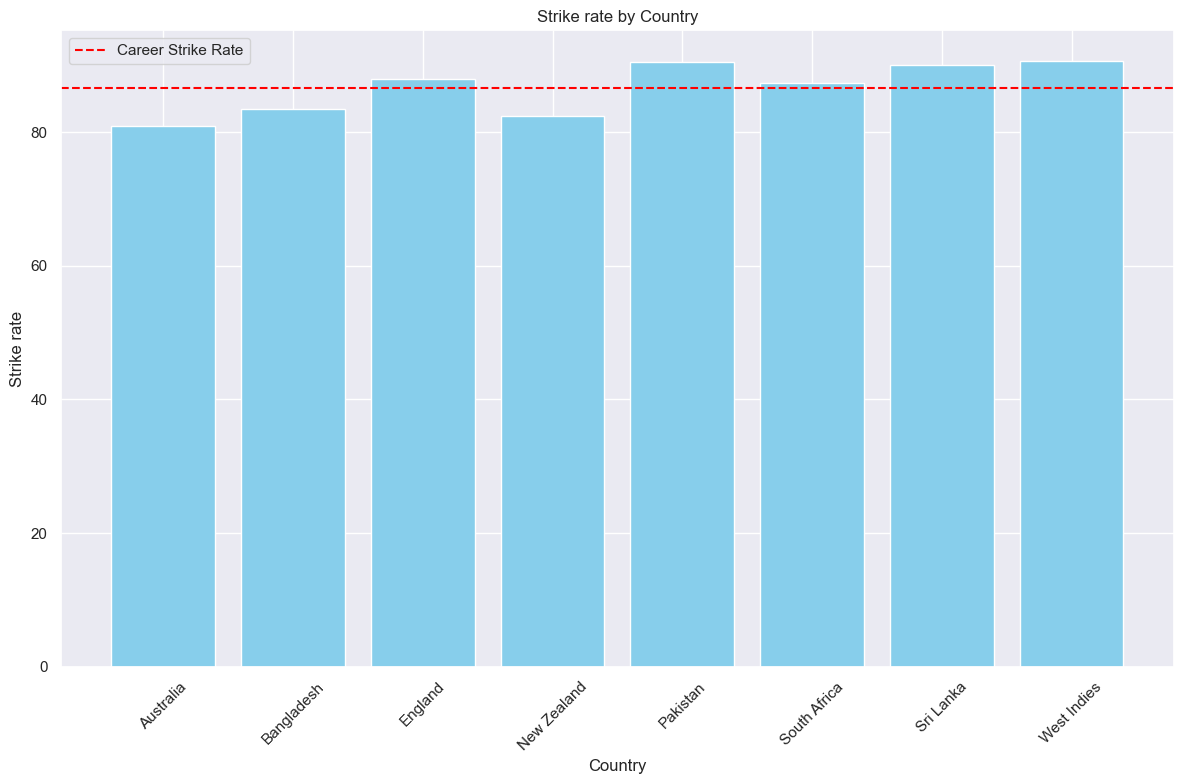

In [32]:
plt.figure(figsize=(12,8))
plt.bar(df_strike_rate['opposition'],df_strike_rate['strike_rate'],color='skyblue')

aggregate_strike_rate=df_strike_rate['strike_rate'].mean()
plt.axhline(y=aggregate_strike_rate,color='red',linestyle='--',label='Career Strike Rate')

plt.xlabel('Country')
plt.ylabel('Strike rate')
plt.title('Strike rate by Country')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()


In [33]:
df_grp_by_4_6 = df_filtered[['opposition','runs_scored', 'fours', 'sixes']].copy()

df_grp_by_4_6['runs_boundaries'] = (df_grp_by_4_6['fours']*4) + (df_grp_by_4_6['sixes']*6)

df_boundaries_selected = df_grp_by_4_6[['opposition','runs_scored', 'runs_boundaries']].copy()
df_boundaries_selected = df_boundaries_selected.groupby('opposition')

df_boundaries_grouped = df_boundaries_selected.sum().reset_index()
df_boundaries_grouped



,opposition,runs_scored,runs_boundaries
0,Australia,1660,646
1,Bangladesh,569,214
2,England,1546,720
3,New Zealand,940,412
4,Pakistan,1231,582
5,South Africa,830,376
6,Sri Lanka,2383,998
7,West Indies,1005,420


In [34]:
plt.figure(figsize=(10,6))
bar_width = 0.35

<Figure size 1000x600 with 0 Axes>

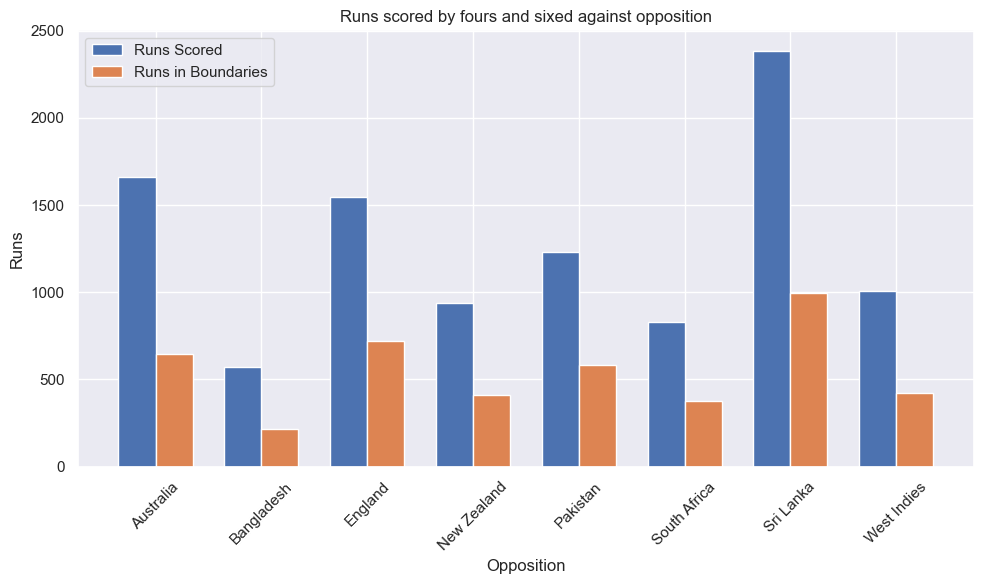

In [35]:
plt.figure(figsize=(10,6))
bar_width = 0.35

index = np.arange(len(df_boundaries_grouped['opposition']))
                 
plt.bar(index, df_boundaries_grouped['runs_scored'],width = bar_width, label = 'Runs Scored')
plt.bar(index + bar_width, df_boundaries_grouped['runs_boundaries'], width = bar_width, label = 'Runs in Boundaries')

plt.xlabel("Opposition")
plt.ylabel("Runs")
plt.title('Runs scored by fours and sixed against opposition')
plt.legend()
plt.xticks(index + bar_width/2, df_boundaries_grouped['opposition'], rotation = 45)
plt.tight_layout()
plt.show()

      opposition  runs_scored  balls_faced  fours  sixes
0     Bangladesh            0            1      0      0
1     Bangladesh           12           11      2      0
2     Bangladesh            7            2      0      1
3       Pakistan            3            7      0      0
4       Pakistan          148          123     15      4
..           ...          ...          ...    ...    ...
343     Pakistan            1            2      0      0
345  West Indies           56           61      3      2
346      England           42           31      4      1
347   Bangladesh           35           33      4      0
349  New Zealand           50           72      1      1

[284 rows x 5 columns]


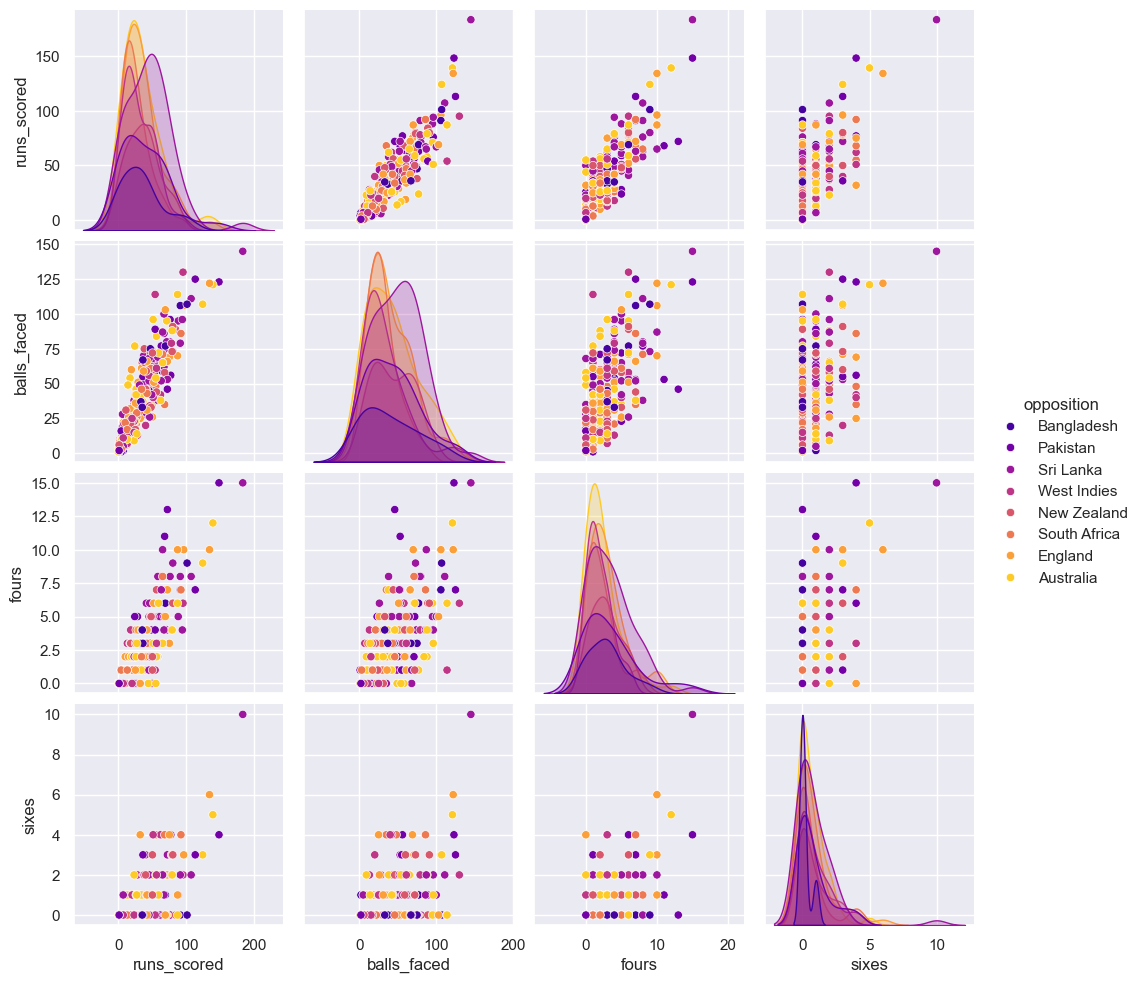

In [36]:
df_pair_plot = df_filtered[['opposition', 'runs_scored', 'balls_faced', 'fours', 'sixes']]
print(df_pair_plot)

sns.pairplot(df_pair_plot, hue='opposition', palette='plasma')
plt.show()


     opposition  runs_scored
0         India          250
1     Australia          330
2       England          220
3  South Africa          280
opposition
Australia       330
England         220
India           250
South Africa    280
Name: runs_scored, dtype: int64


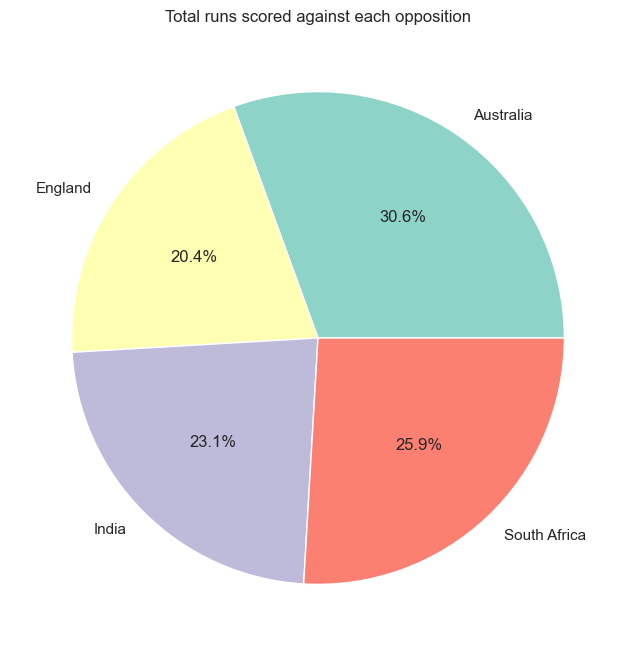

In [40]:
#create a sample dataset
df_filtered=pd.DataFrame({'opposition':['India','Australia','England','South Africa'],'runs_scored':[250,330,220,280]})
print(df_filtered)
df_grouped = df_filtered.groupby('opposition')['runs_scored'].sum()
print(df_grouped)
#Create a Pie chart
plt.figure(figsize=(12,8))
plt.pie(df_grouped,labels=df_grouped.index,autopct='%1.1f%%',colors=sns.color_palette('Set3'))
plt.title('Total runs scored against each opposition')
plt.show()